In [373]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import os, sys
import numpy as np
import csv
import pandas as pd
sys.path.append("./pylinguistics/")
import Pylinguistics as pl
import json
import csv
import gc
from pandas import read_csv



fapespall=pd.read_csv('/home/vinicius/phd/experiments/fapesp/fapesp_features.csv')
fapespall.drop('Unnamed: 0', axis=1, inplace=True)




a1=pd.DataFrame(fapespall.loc[7]).T
a2=pd.DataFrame(fapespall.loc[55]).T
a3=pd.DataFrame(fapespall.loc[167]).T
a4=pd.DataFrame(fapespall.loc[201]).T
a5=pd.DataFrame(fapespall.loc[204]).T

a6=pd.DataFrame(fapespall.loc[267]).T
a7=pd.DataFrame(fapespall.loc[475]).T
a8=pd.DataFrame(fapespall.loc[807]).T
a9=pd.DataFrame(fapespall.loc[897]).T
a0=pd.DataFrame(fapespall.loc[1067]).T

aq=pd.DataFrame(fapespall.loc[1152]).T
aw=pd.DataFrame(fapespall.loc[1157]).T
ae=pd.DataFrame(fapespall.loc[1486]).T
ar=pd.DataFrame(fapespall.loc[1568]).T
at=pd.DataFrame(fapespall.loc[1618]).T

ay=pd.DataFrame(fapespall.loc[2185]).T
au=pd.DataFrame(fapespall.loc[2481]).T
ai=pd.DataFrame(fapespall.loc[2537]).T
ao=pd.DataFrame(fapespall.loc[2611]).T
ap=pd.DataFrame(fapespall.loc[2807]).T

fapespResult = pd.concat([a1,a2,a3,a4,a5,a6,a7,a8,a9,a0,aq,aw,ae,ar,at,ay,au,ai,ao,ap])

fapespResult.to_csv('pylinguisticsResults.csv',sep='\t')


In [374]:
pyling=pd.read_csv('pylinguisticsResults.csv', sep='\t')
cohmetrix=pd.read_csv('cohmetrixResults.csv', sep='\t')

def calcMse(a, b):
    r = a - b
    r = r*r
    return r

def calcPmedia(a, b):
    
    return ((100*a) / (float(b)))-100
    
dic={'adjectiveIncidence':'basic_counts:adjectives','advIncidence':'basic_counts:adverbs','contentIncidence':'basic_counts:content_words','redability':'basic_counts:flesch','functionalIncidence':'basic_counts:function_words','avg_word_per_sentence':'basic_counts:words_per_sentence','nounIncidence':'basic_counts:nouns','sentence_count':'basic_counts:sentences','word_count':'basic_counts:words','pronIncidence':'basic_counts:pronouns','verbIncidence':'basic_counts:verbs','ConnectiveIncidence':'connectives:conn_incidence','LexicalDiversty':'Tokens:ttr', 'LogicOperatorsIncidence':'logic_operators:logic_operators'}

result = []
resultp=[]
for index, row in pyling.iterrows():
    mse = {}
    pmedia={}
    for key in dic:
        mse[key] = calcMse(pyling.loc[index][key], cohmetrix.loc[index][dic[key]])
        pmedia[key] = calcPmedia(pyling.loc[index][key], cohmetrix.loc[index][dic[key]])

    result.append(mse)
    resultp.append(pmedia)

    


In [375]:
dfresult = pd.DataFrame(resultp)
dfresult.head(20)


,ConnectiveIncidence,LexicalDiversty,LogicOperatorsIncidence,adjectiveIncidence,advIncidence,avg_word_per_sentence,contentIncidence,functionalIncidence,nounIncidence,pronIncidence,redability,sentence_count,verbIncidence,word_count
0,-15.789474,0.000000,33.333333,66.666667,-9.090909,0.000000,-11.229947,12.631579,-18.181818,-15.088757,27.041368,0.000000,-13.793103,0.000000
1,-32.886923,-2.485189,12.571001,11.440446,-31.712444,11.863557,-8.706476,0.531322,-10.968774,-6.712293,41.292408,-10.000000,-10.410622,0.677201
2,-52.941176,0.000000,21.428571,54.166667,-11.111111,5.263158,-15.360502,7.608696,-19.730942,-2.501840,-4.360509,-5.000000,-26.984127,0.000000
3,-47.708886,-0.110840,10.669024,25.651908,-13.979986,38.787499,-9.413587,6.819667,-13.086046,-4.990621,-16.327457,-27.659574,-24.112669,0.399467
4,-48.000000,-1.117318,0.000000,23.076923,66.666667,0.000000,-4.191617,-3.225806,-10.091743,-10.000000,17.624334,0.000000,-13.793103,0.000000
5,-8.919753,4.579946,110.185185,3157.870370,5.092593,-4.845815,-15.826312,189.004630,-24.896609,-15.456238,18.061547,0.000000,12.098765,-4.845815
6,-41.145997,-2.038565,9.775510,32.082833,-11.292517,-5.069422,-8.064719,1.875000,-11.782614,-11.891892,4.320654,5.555556,-16.347539,0.204499
7,-28.972713,-1.284985,13.643660,4.173355,-27.078652,-4.006163,-9.514433,-1.917773,-3.735357,-10.152284,-16.134081,4.761905,-22.278187,0.564972
8,-34.848623,-0.842783,18.095741,17.227390,-16.963932,6.630370,-7.865479,-0.061916,-14.313269,-6.077210,-3.593980,-5.882353,1.471599,0.357995
9,-15.848261,-1.019282,21.552511,30.530822,-20.438356,0.550964,-5.732649,0.936414,-7.222580,-15.972222,23.393607,0.000000,-11.598174,0.550964


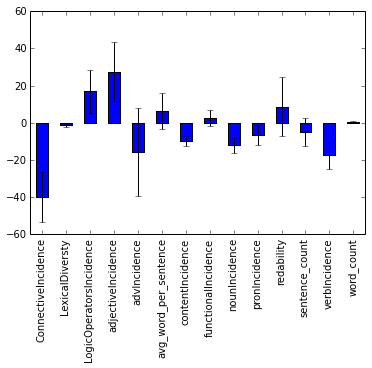

In [376]:
saida = dfresult[dfresult.adjectiveIncidence < 200 ]
#print saida
#print saida.columns[[8]]
#saida.drop('u'redability'',  inplace=True)
#saida.drop(saida.columns[[8]],  inplace=True)
#saida.drop('adjectiveIncidence',  inplace=True)

yerrs =saida.std()

saida.mean().plot(kind='bar' ,yerr=yerrs)

In [377]:
%matplotlib inline
import matplotlib.pyplot as plt

dfresult = pd.DataFrame(result)
dfresult.head(20)

,ConnectiveIncidence,LexicalDiversty,LogicOperatorsIncidence,adjectiveIncidence,advIncidence,avg_word_per_sentence,contentIncidence,functionalIncidence,nounIncidence,pronIncidence,redability,sentence_count,verbIncidence,word_count
0,109.264408,0.000000e+00,109.264408,1214.048975,12.140490,0.000000,5353.955979,1748.230524,6992.922095,70.759234,8.689143,0,194.247836,0
1,754.470865,2.362721e-04,18.118191,112.110474,131.187344,27.620864,2857.690272,3.916304,1648.907960,19.307690,15.206411,1,143.643582,9
2,1153.435386,0.000000e+00,32.039872,601.637593,3.559986,1.945291,8547.525810,697.757209,6892.132431,0.721958,2.004087,1,1028.835885,0
3,2582.846822,2.622850e-07,26.156194,492.931054,16.771771,38.412070,3382.722691,628.151844,2993.617669,3.219265,16.967331,169,409.158702,9
4,1632.486481,4.534685e-05,0.000000,408.121620,45.346847,0.000000,555.498872,181.387387,1371.742112,45.346847,8.113866,0,181.387387,0
5,8.685133,4.276778e-04,147.256582,4838.122842,0.113242,7.562500,21640.766928,17747.334521,48840.350957,1.043130,60.318460,0,15.979122,484
6,1076.878417,1.285788e-04,15.985313,497.605923,4.319652,1.896661,2319.137340,54.198502,1902.053387,36.962744,0.603409,1,516.779018,1
7,525.155427,4.428659e-05,29.114632,2.724082,58.512351,1.026143,3105.257289,63.132186,174.900471,28.658573,9.317337,1,1332.321829,9
8,467.616584,1.700244e-05,33.993216,109.923691,23.604102,2.670581,2123.856987,0.062366,2749.580153,28.026330,1.138021,4,3.663902,9
9,128.853641,3.510268e-05,28.554038,181.093852,31.701417,0.023669,1110.356494,11.949011,878.909137,55.951957,33.454055,0,132.303385,4


In [378]:
cohmetrix[dic['redability']].head(20)


0     10.900836
1     -9.443721
2     32.465425
3     25.228313
4     16.162227
5    -43.000171
6     17.978625
7     18.919153
8     29.682436
9     24.724482
10    29.993934
11    30.246734
12     6.928000
13    36.655250
14    32.591965
15    23.725006
16    15.490058
17    26.447105
18    40.255350
19    21.474345
Name: basic_counts:flesch, dtype: float64

In [379]:
pyling.head(20)

,Unnamed: 0,ConnectiveAdditiveIncidence,ConnectiveCasualIncidence,ConnectiveIncidence,ConnectiveLogicIncidence,ConnectiveTemporalIncidence,ContentDiversty,LexicalDiversty,LogicAndIncidence,LogicIfIncidence,...,avg_word_per_sentence,contentIncidence,functionalIncidence,nounIncidence,pronIncidence,redability,sentence_count,syllable_count,verbIncidence,word_count
0,7,41.811847,3.484321,55.749129,38.327526,3.484321,0.819277,0.641115,38.327526,3.484321,...,41.000000,578.397213,372.822300,376.306620,47.337278,13.848571,7,656,87.108014,287
1,55,38.116592,13.452915,56.053812,31.390135,2.242152,0.824000,0.603139,31.390135,4.484305,...,49.555556,560.538117,374.439462,329.596413,61.068702,-13.343261,9,1117,103.139013,446
2,167,26.415094,3.773585,30.188679,24.528302,0.000000,0.588889,0.441509,22.641509,5.660377,...,27.894737,509.433962,373.584906,337.735849,33.112583,31.049767,19,1187,86.792453,530
3,201,46.419098,6.631300,55.702918,46.419098,0.000000,0.639810,0.461538,42.440318,1.326260,...,22.176471,559.681698,392.572944,363.395225,34.157833,21.109171,34,1829,63.660477,754
4,204,33.670034,6.734007,43.771044,30.303030,3.367003,0.818750,0.595960,30.303030,0.000000,...,29.700000,538.720539,404.040404,329.966330,60.606061,19.010712,10,701,84.175084,297
5,267,23.148148,4.629630,30.092593,23.148148,2.314815,0.541420,0.472222,23.148148,0.000000,...,54.000000,782.407407,203.703704,666.666667,5.586592,-50.766667,8,1250,37.037037,432
6,475,40.816327,4.081633,46.938776,38.775510,0.000000,0.769517,0.544898,36.734694,4.081633,...,25.789474,548.979592,400.000000,326.530612,45.045045,18.755419,19,1181,116.326531,490
7,807,39.325843,3.745318,56.179775,41.198502,3.745318,0.706714,0.511236,29.962547,3.745318,...,24.272727,529.962547,406.367041,340.823970,47.377327,15.866721,22,1315,127.340824,534
8,897,28.537455,10.701546,40.428062,26.159334,0.000000,0.711454,0.485137,26.159334,5.945303,...,26.281250,539.833532,403.091558,313.912010,81.818182,28.615655,32,1924,131.985731,841
9,1067,35.616438,13.698630,60.273973,24.657534,2.739726,0.755000,0.575342,21.917808,5.479452,...,28.076923,547.945205,372.602740,380.821918,39.351852,30.508430,13,819,87.671233,365


In [380]:
dfresult.head(20)

,ConnectiveIncidence,LexicalDiversty,LogicOperatorsIncidence,adjectiveIncidence,advIncidence,avg_word_per_sentence,contentIncidence,functionalIncidence,nounIncidence,pronIncidence,redability,sentence_count,verbIncidence,word_count
0,109.264408,0.000000e+00,109.264408,1214.048975,12.140490,0.000000,5353.955979,1748.230524,6992.922095,70.759234,8.689143,0,194.247836,0
1,754.470865,2.362721e-04,18.118191,112.110474,131.187344,27.620864,2857.690272,3.916304,1648.907960,19.307690,15.206411,1,143.643582,9
2,1153.435386,0.000000e+00,32.039872,601.637593,3.559986,1.945291,8547.525810,697.757209,6892.132431,0.721958,2.004087,1,1028.835885,0
3,2582.846822,2.622850e-07,26.156194,492.931054,16.771771,38.412070,3382.722691,628.151844,2993.617669,3.219265,16.967331,169,409.158702,9
4,1632.486481,4.534685e-05,0.000000,408.121620,45.346847,0.000000,555.498872,181.387387,1371.742112,45.346847,8.113866,0,181.387387,0
5,8.685133,4.276778e-04,147.256582,4838.122842,0.113242,7.562500,21640.766928,17747.334521,48840.350957,1.043130,60.318460,0,15.979122,484
6,1076.878417,1.285788e-04,15.985313,497.605923,4.319652,1.896661,2319.137340,54.198502,1902.053387,36.962744,0.603409,1,516.779018,1
7,525.155427,4.428659e-05,29.114632,2.724082,58.512351,1.026143,3105.257289,63.132186,174.900471,28.658573,9.317337,1,1332.321829,9
8,467.616584,1.700244e-05,33.993216,109.923691,23.604102,2.670581,2123.856987,0.062366,2749.580153,28.026330,1.138021,4,3.663902,9
9,128.853641,3.510268e-05,28.554038,181.093852,31.701417,0.023669,1110.356494,11.949011,878.909137,55.951957,33.454055,0,132.303385,4


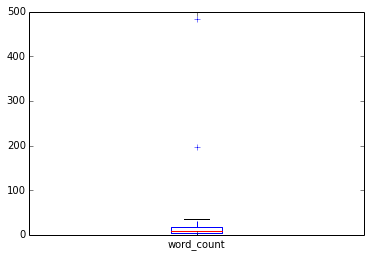

In [381]:
dfresult.word_count.plot(kind='box')